In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-06-28 05:05:14--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-06-28 05:05:14 (404 MB/s) - ‘iris.data.1’ saved [4551/4551]



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data = np.genfromtxt('iris.data', delimiter=',', dtype=str)

In [ ]:
print(data[0,:-1])
print(data[0,-1])
print(data[:5])

['5.1' '3.5' '1.4' '0.2']
Iris-setosa
[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']]


In [ ]:
x = data[:,:-1].astype(np.float32)
y = data[:,-1]

In [ ]:
print(y[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [ ]:
def iris_type(y):
    for i in range(len(y)):
        if y[i] == 'Iris-setosa':
            y[i]=0
        elif y[i] == 'Iris-versicolor':
            y[i]=1
        elif y[i] == 'Iris-virginica':
            y[i]=2
    y = y.astype(np.int)
    return y

In [ ]:
y = iris_type(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(x[0])
print(x.shape)
print(y.shape)

[5.1 3.5 1.4 0.2]
(150, 4)
(150,)


In [ ]:
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])


(120, 4)
(120,)
[0 0 1 0 0 2 1 0 0 0]


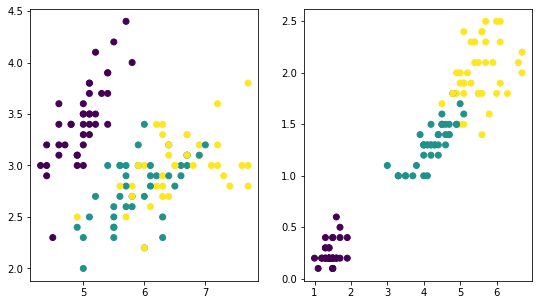

In [ ]:
plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

plt.subplot(1,2,2)
plt.scatter(x_train[:,2], x_train[:,3], c=y_train)

plt.show()

In [ ]:
y_test = tf.one_hot(y_test, depth=3)
y_train = tf.one_hot(y_train, depth=3)

In [ ]:
print(y_train[:10])

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(10, 3), dtype=float32)


In [ ]:
model = Sequential()

model.add(layers.Dense(64, input_shape=[4]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 49ms/step - loss: 1.3672 - accuracy: 0.2583 - val_loss: 1.1938 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1180 - accuracy: 0.2833 - val_loss: 1.0097 - val_accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9759 - accuracy: 0.3000 - val_loss: 0.9008 - val_accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8863 - accuracy: 0.5583 - val_loss: 0.8350 - val_accuracy: 0.7000
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8334 - accuracy: 0.6667 - val_loss: 0.7940 - val_accuracy: 0.7000
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7911 - accuracy: 0.6750 - val_loss: 0.7582 - val_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7572 - accuracy: 0.6917 - val_loss: 0.7278 - val_accuracy: 0.8333
Epoch 8/50
4/4 [=================

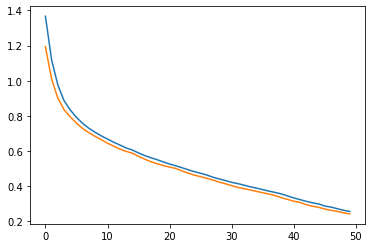

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
print(y_hat[0])
print(y_test[0])

[0.0057864  0.66717345 0.32704023]
tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)


In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(y_hat[:10])
print(y_test[:10])

[1 0 2 1 1 0 1 2 1 1]
[1 0 2 1 1 0 1 2 1 1]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_hat)

In [ ]:
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[0,2]+conf_matrix[1,0]+conf_matrix[1,1]+conf_matrix[1,2]+conf_matrix[2,0]+conf_matrix[2,1]+conf_matrix[2,2])


In [ ]:
print(accuracy)

1.0


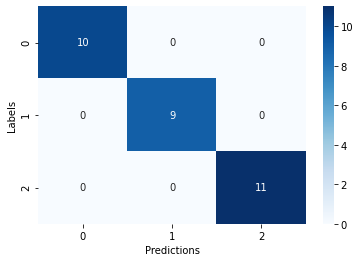

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.ylabel('Labels')
plt.xlabel('Predictions')
plt.show()